In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.loc[data['Sales']>=7,'sales'] = 'high'
data.loc[data['Sales']<7,'sales']='Low'

In [5]:
data.drop('Sales',axis=1,inplace=True)

In [6]:
data.shape

(400, 11)

In [7]:
data.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

In [8]:
data.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
sales          object
dtype: object

In [9]:
data.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
le =LabelEncoder()
data['ShelveLoc']=le.fit_transform(data['ShelveLoc'])
data['ShelveLoc'].unique()

array([0, 1, 2])

In [11]:
data['Urban']=le.fit_transform(data['ShelveLoc'])
data['Urban'].unique()

array([0, 1, 2], dtype=int64)

In [12]:
data['US']= le.fit_transform(data['US'])
data['US'].unique()

array([1, 0])

In [13]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,0,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,2,1,high
3,117,100,4,466,97,2,55,14,2,1,high
4,141,64,3,340,128,0,38,13,0,0,Low


In [14]:
x = data.drop('sales',axis= 1)
y = data[['sales']]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=12)

In [16]:
x_train.shape,y_train.shape

((320, 10), (320, 1))

In [17]:
x_test.shape,y_test.shape

((80, 10), (80, 1))

In [18]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
y_train.value_counts()

sales
high     174
Low      146
dtype: int64

In [20]:
y_pred_train =model.predict(x_train)

In [21]:
print('Accuracy Score:',accuracy_score(y_train,y_pred_train))

Accuracy Score: 0.715625


In [22]:
print('confusion Matrix :\n',confusion_matrix(y_train,y_pred_train))

confusion Matrix :
 [[138   8]
 [ 83  91]]


In [23]:
y_pred_test = model.predict(x_test)

In [24]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_test))

Accuracy Score: 0.7875


In [25]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

Confusion Matrix:
 [[36  2]
 [15 27]]


In [26]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [27]:
y_pred_tr = gbc.predict(x_train)

In [28]:
print('Accuracy Score:',accuracy_score(y_train,y_pred_tr))

Accuracy Score: 0.996875


In [29]:
print('confusion Matrix:\n',confusion_matrix(y_train,y_pred_tr))

confusion Matrix:
 [[146   0]
 [  1 173]]


In [30]:
y_prd_test =gbc.predict(x_test)

In [31]:
print('Accuracy Score:',accuracy_score(y_test,y_prd_test))

Accuracy Score: 0.85


In [32]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_prd_test))

Confusion Matrix:
 [[33  5]
 [ 7 35]]


In [33]:
Ad_classifier = AdaBoostClassifier()
Ad_classifier.fit(x_train,y_train)

AdaBoostClassifier()

In [34]:
y_pred_train1 = Ad_classifier.predict(x_train)

In [35]:
print('Accuracy Score:',accuracy_score(y_train,y_pred_train1))

Accuracy Score: 0.953125


In [36]:
print('confusion Matrix:\n',confusion_matrix(y_train,y_pred_train1))

confusion Matrix:
 [[141   5]
 [ 10 164]]


In [37]:
y_pred_test1 = Ad_classifier.predict(x_test)

In [42]:
print('Accuracy Score',accuracy_score(y_test,y_pred_test1))

Accuracy Score 0.7875


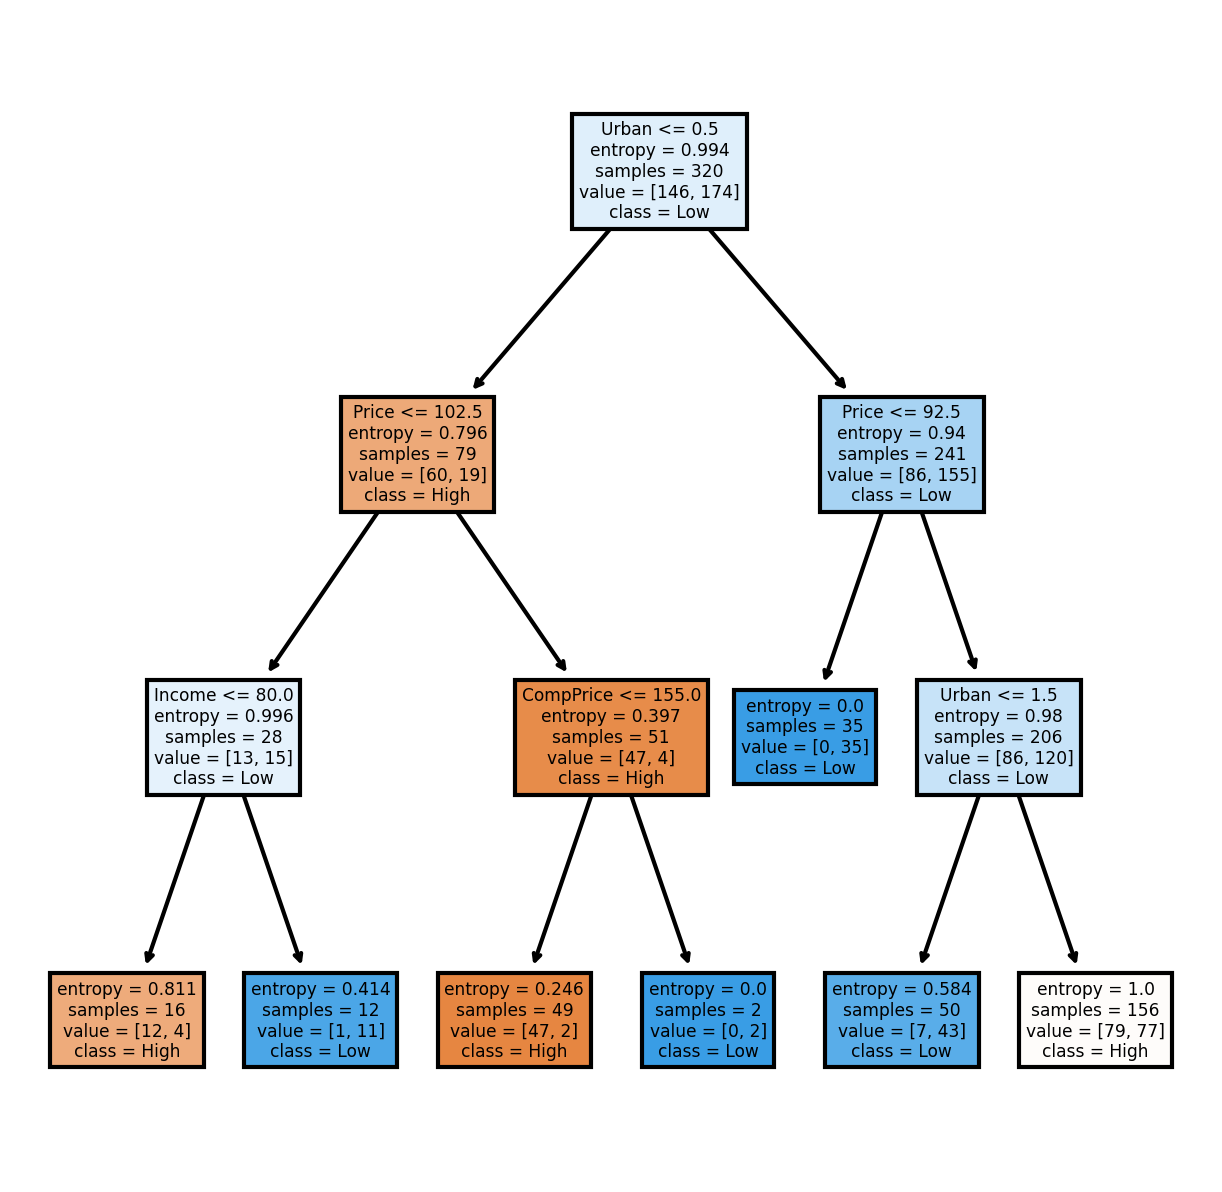

In [41]:
fn =['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn =['High','Low']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize =(5,5),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.show()
